In [2]:
# Cited Reference Analysis from Web of Science Plain Text
import pandas as pd
import matplotlib.pyplot as plt

# Display full columns
pd.set_option('display.max_colwidth', None)

In [3]:
# Load exploded references (output of extract_cited_refs.py)
df = pd.read_csv('../outputs/exploded_references.csv')

print(f"✅ Loaded {len(df)} cited references from {df['Article_Index'].nunique()} source articles.")
df.head()

✅ Loaded 5481 cited references from 50 source articles.


,Article_Index,Cited_Reference
0,0,"Abbott BW, 2019, NAT GEOSCI, V12, P533, DOI 10.1038/s41561-019-0374-y"
1,0,"Abdelahad N, 2015, EUR J PHYCOL, V50, P318, DOI 10.1080/09670262.2015.1055592"
2,0,"Abou Rafee SA, 2019, WATER-SUI, V11, DOI 10.3390/w11050882"
3,0,"ABS (Australian Bureau of Statistics), 2010, Wine and Brandy Statistics"
4,0,"Adamo M, 2022, BIOL CONSERV, V272, DOI 10.1016/j.biocon.2022.109636"


In [4]:
# Drop duplicates in case same article cited the same reference more than once
df_unique = df.drop_duplicates(subset=['Article_Index', 'Cited_Reference'])

# Count number of articles citing each reference
ref_counts = df_unique.groupby('Cited_Reference').agg(
    Articles_Citing=('Article_Index', 'nunique')
).reset_index()

# Sort by most cited
ref_counts_sorted = ref_counts.sort_values(by='Articles_Citing', ascending=False)

print(f"📚 Found {len(ref_counts_sorted)} unique references.")
ref_counts_sorted.head(10)

📚 Found 5241 unique references.


,Cited_Reference,Articles_Citing
3348,"Pan YD, 2011, SCIENCE, V333, P988, DOI 10.1126/science.1201609",5
1949,"Hijmans RJ, 2005, INT J CLIMATOL, V25, P1965, DOI 10.1002/joc.1276",5
3432,"Pereira HM, 2013, SCIENCE, V339, P277, DOI 10.1126/science.1229931",5
985,"Crowther TW, 2015, NATURE, V525, P201, DOI 10.1038/nature14967",4
520,"Bongaarts J, 2019, POPUL DEV REV, V45, P680, DOI 10.1111/padr.12283",4
4752,"Waycott M, 2009, P NATL ACAD SCI USA, V106, P12377, DOI 10.1073/pnas.0905620106",4
4793,"Wernberg T, 2016, SCIENCE, V353, P169, DOI 10.1126/science.aad8745",4
2890,"McGill BJ, 2006, TRENDS ECOL EVOL, V21, P178, DOI 10.1016/j.tree.2006.02.002",3
631,"Bruelheide H, 2018, NAT ECOL EVOL, V2, P1906, DOI 10.1038/s41559-018-0699-8",3
5222,"van den Hoogen J, 2019, NATURE, V572, P194, DOI 10.1038/s41586-019-1418-6",3


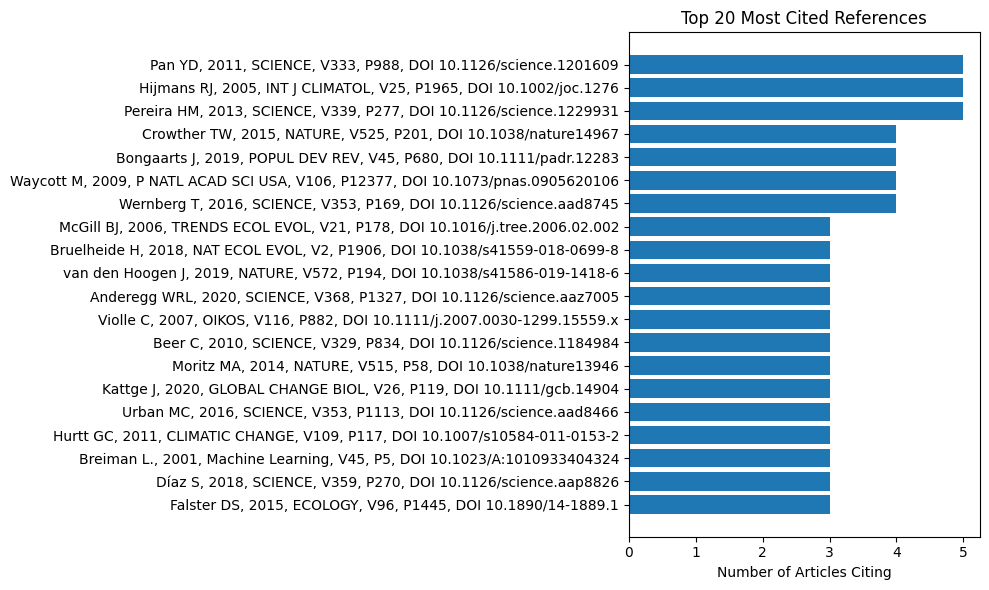

In [8]:
top_n = 20
top_refs = ref_counts_sorted.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_refs['Cited_Reference'][::-1], top_refs['Articles_Citing'][::-1])
plt.xlabel("Number of Articles Citing")
plt.title(f"Top {top_n} Most Cited References")
plt.tight_layout()
plt.show()